In [98]:
import sys
import os


from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqIO import FastaIO

import networkx as nx
from networkx.drawing.nx_agraph import write_dot
from networkx.drawing.nx_agraph import read_dot

import edlib

import graphviz
from IPython.display import Image, display, HTML

PATH = "PATH_TO_DIR_WITH_IPYNB"
DATA_PATH = "PATH_TO_FIGSHARE"
OUT_PATH = "PATH_TO_OUTDIR"
threads = 1

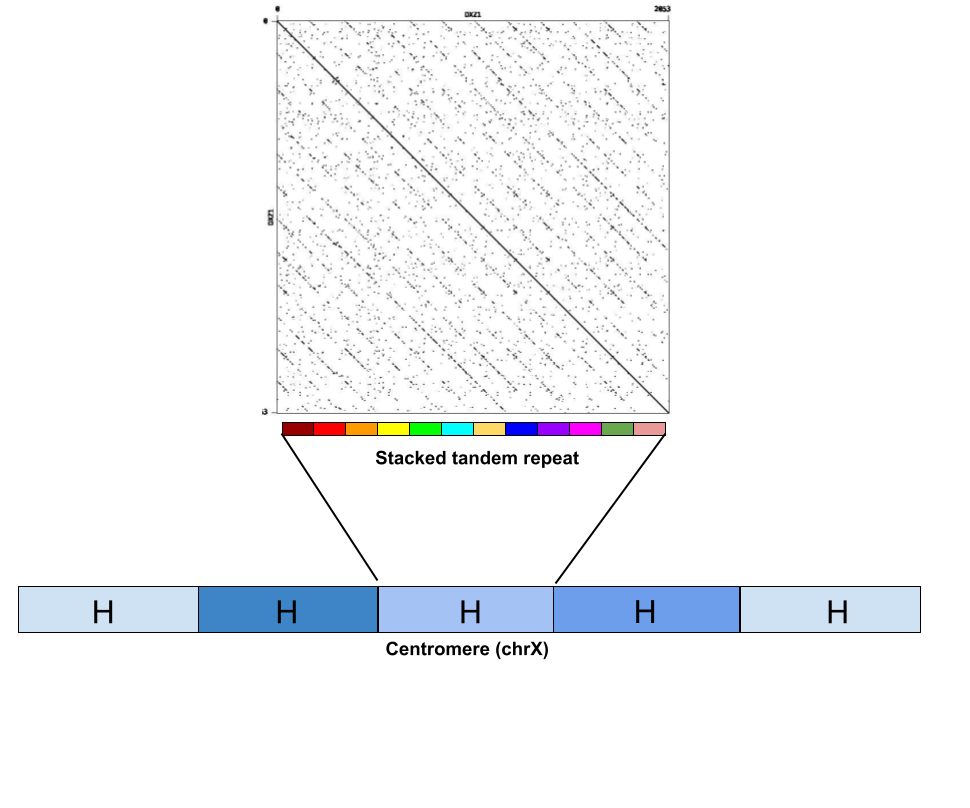

In [99]:
######### Figure cenXArchitecture ########
######### https://docs.google.com/drawings/d/19KvWVzJIhUYJHTYc2YLMKspB-c8Y4tAwLmQio89Jqn4/edit

Image(filename=os.path.join(DATA_PATH, "PaperFigures","cenXArchitecture.png"))

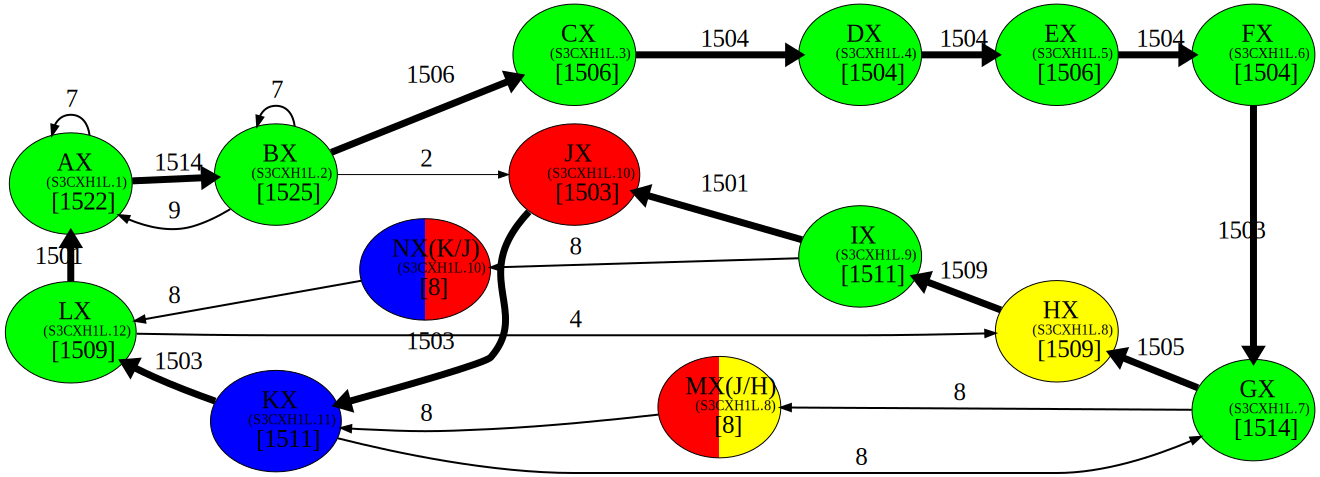

In [101]:
######### Figure MonomerGraphX (up) ########

with open(os.path.join(DATA_PATH, "PaperFigures","MonomerGraphX_up.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

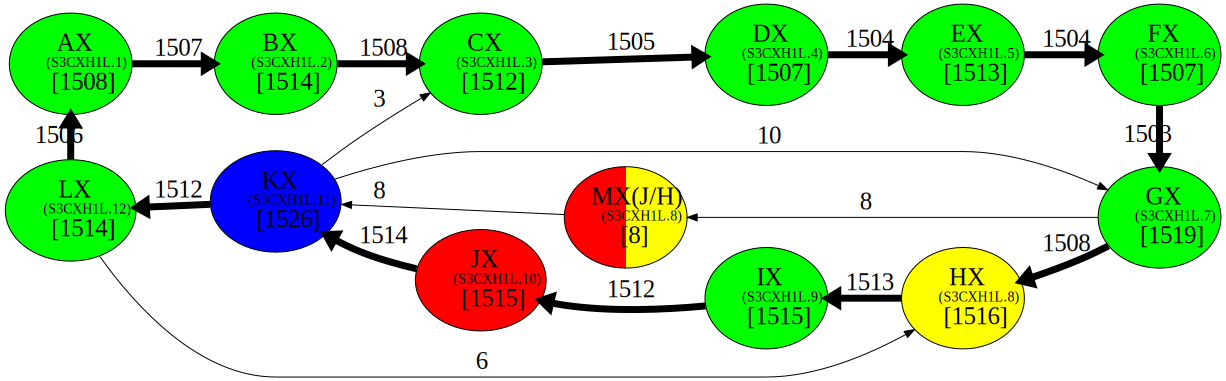

In [102]:
######### Figure MonomerGraphX (bottom) ########

with open(os.path.join(DATA_PATH, "PaperFigures","MonomerGraphX_bottom.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
######### Run CA on all centromeric sequences (very time-consuming) ##############

cens = [str(i) for i in range(1, 23)] + ["X"]
# all_cens_path = os.path.join(OUT_PATH, "all_cens.fa")
# with open(all_cens_path, 'w') as outfile:
#     for c in cens:
#         with open(os.path.join(DATA_PATH, "CentromereFasta", "cen" + c + ".fa")) as infile:
#             for line in infile:
#                 outfile.write(line)
# os.system(" ".join(["python3",\ 
#                     os.path.join(PATH, "HORmon", "HORmon", "monomer_inference.py"),\
#                     "-seq", all_cens_path,
#                     "-mon", os.path.join(PATH, "HORmon", "test_data", "AlphaSat.fa"),
#                     "-t", str(threads), "--resDiv", "5",\
#                     "--maxDiv", "25", "--min-cluster-size", "5", \
#                     "-o", os.path.join(OUT_PATH, "CAMonomers")
#                      ]))

In [108]:
######### Run HORmon on centromeres from cens ##############

#cens = [str(i) for i in range(1, 23)] + ["X"]
cens = ["1", "5", "8", "13", "18", "X"]
# for c in cens:
#     os.system(" ".join(["python3", os.path.join(PATH, "centromere-architect", "src", "HORmon.py"),\
#                        "--cen-id", c,\
#                        "--original_mn", os.path.join(DATA_PATH, "MonomersT2T", "cen" + c + "_monomers.fa"),\
#                        "--seq", os.path.join(DATA_PATH, "CentromereFasta", "cen" + c + ".fa"), \
#                        "--mon", os.path.join(DATA_PATH, "CAMonomers", "cen" + c + "_monomers.fa"), \
#                        "-t", str(threads), "-o", os.path.join(OUT_PATH, "cen" + c)] ))

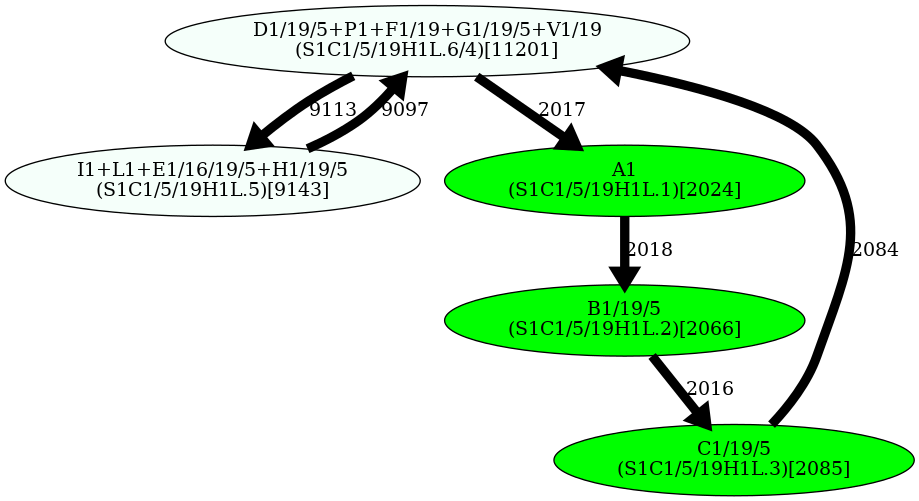

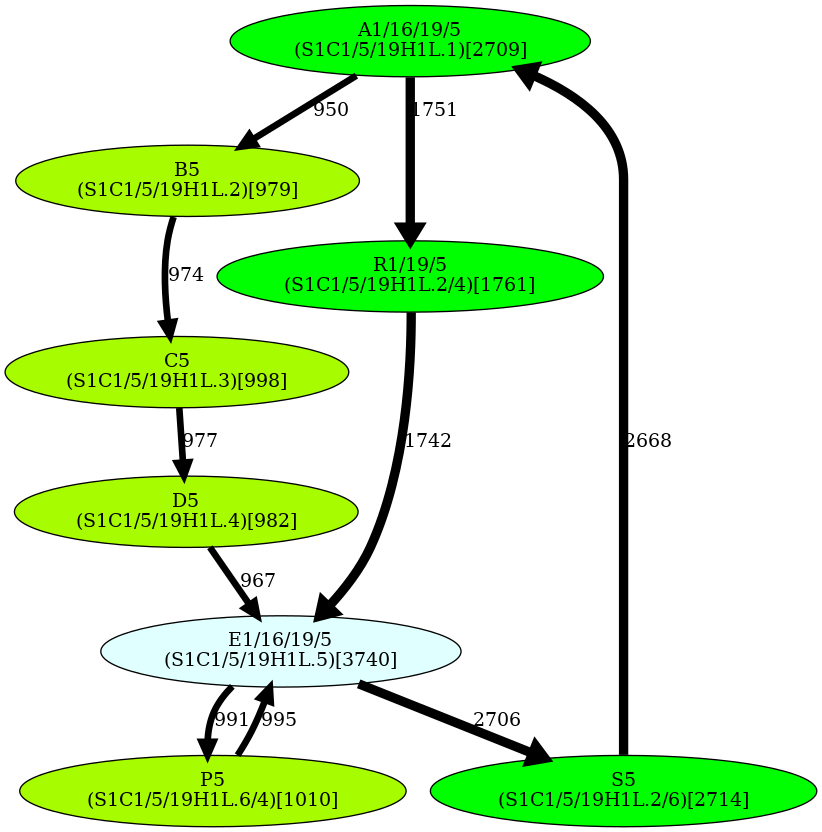

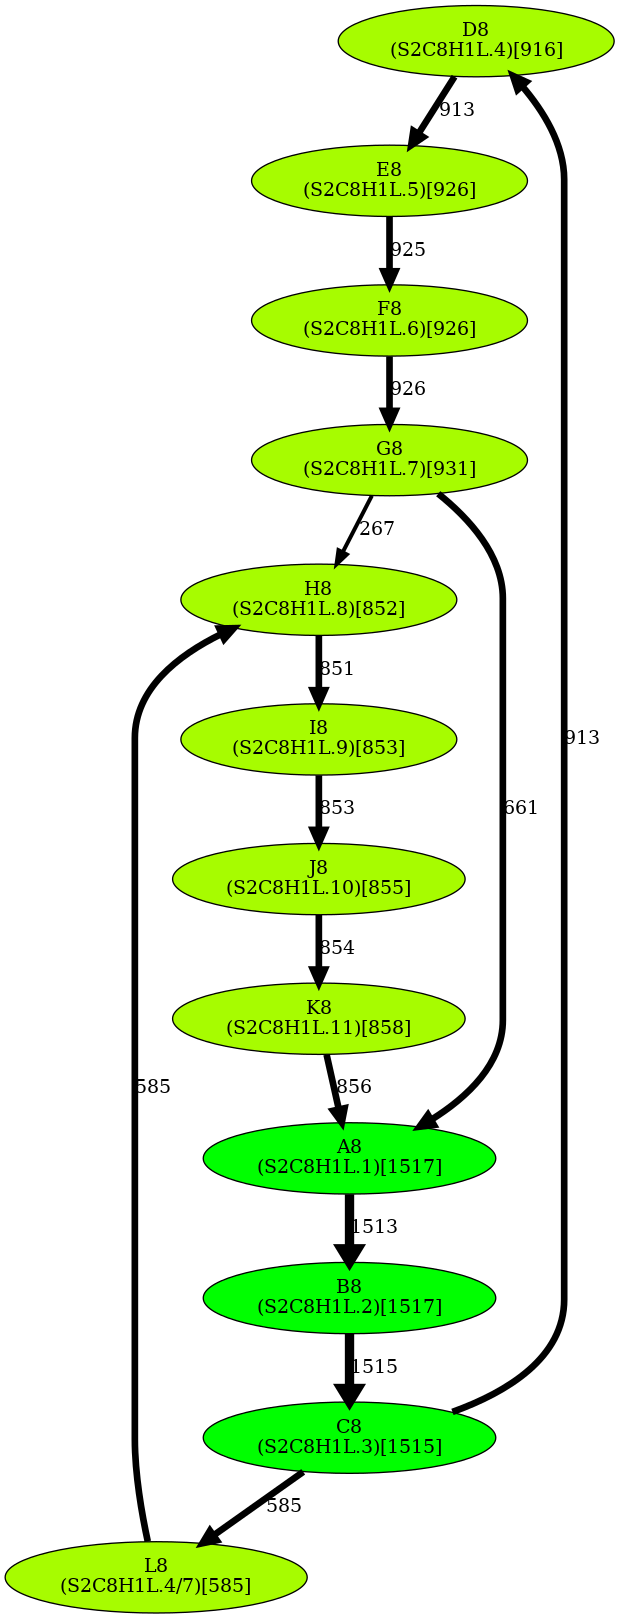

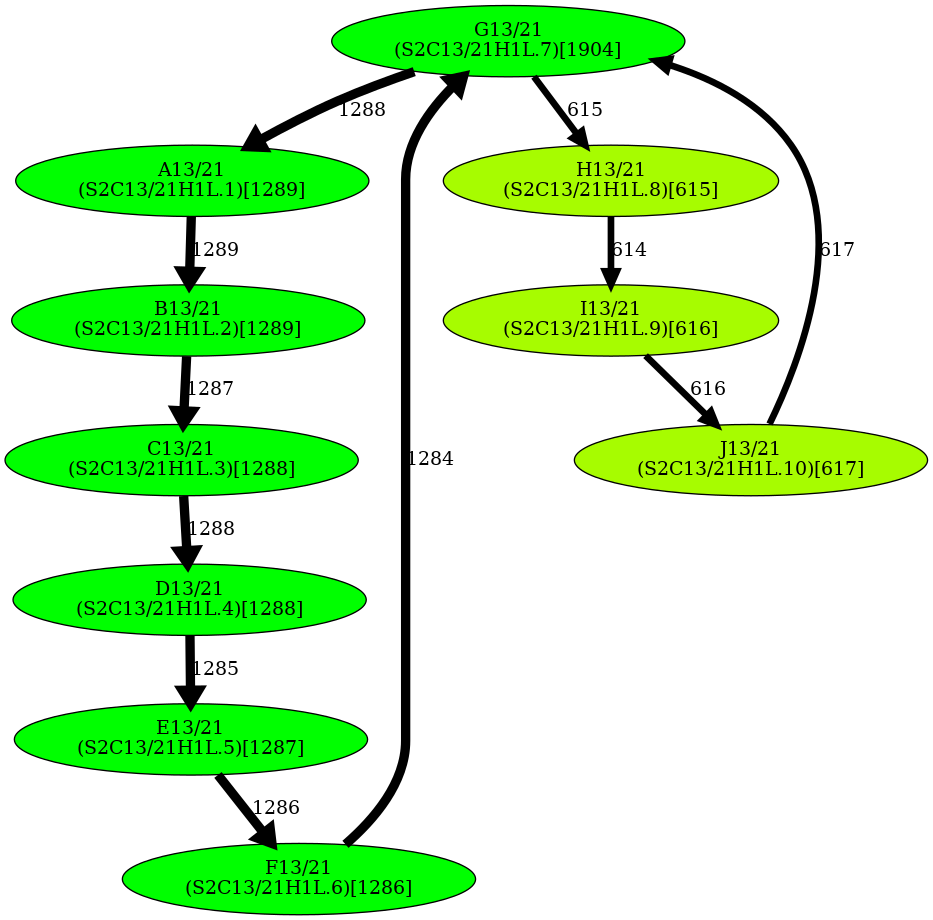

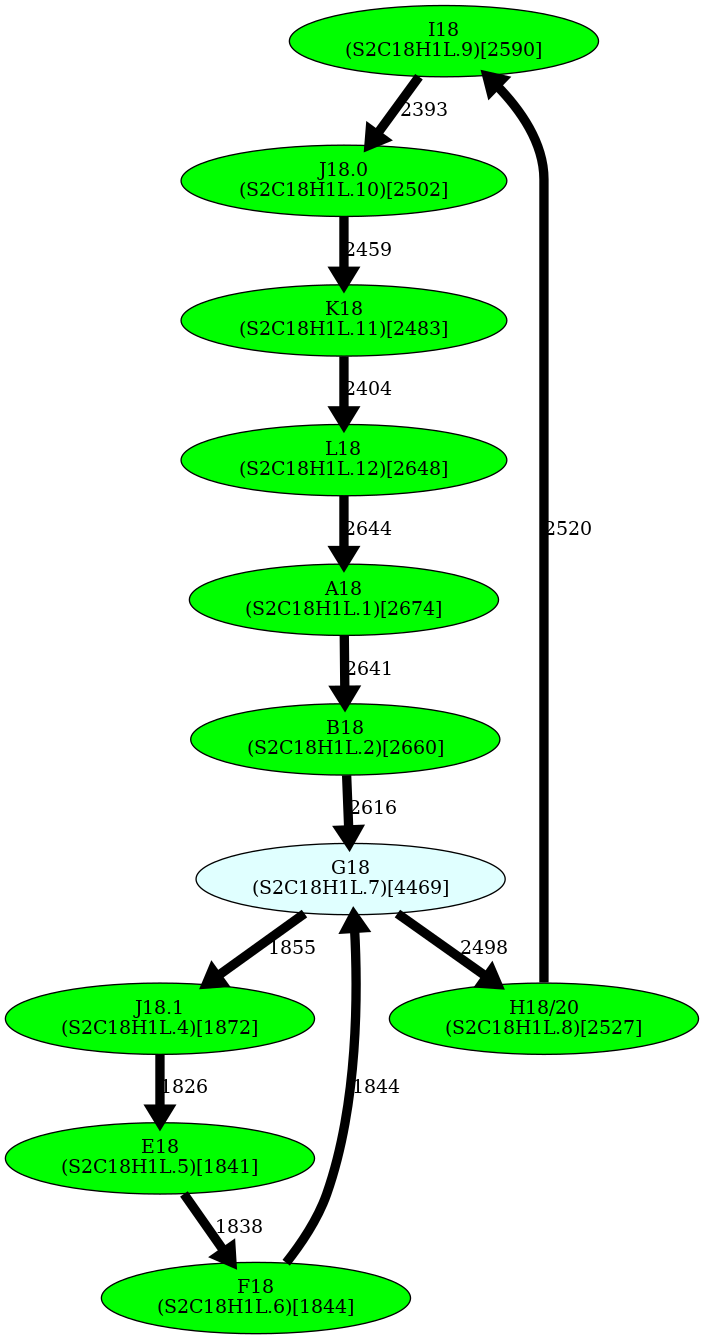

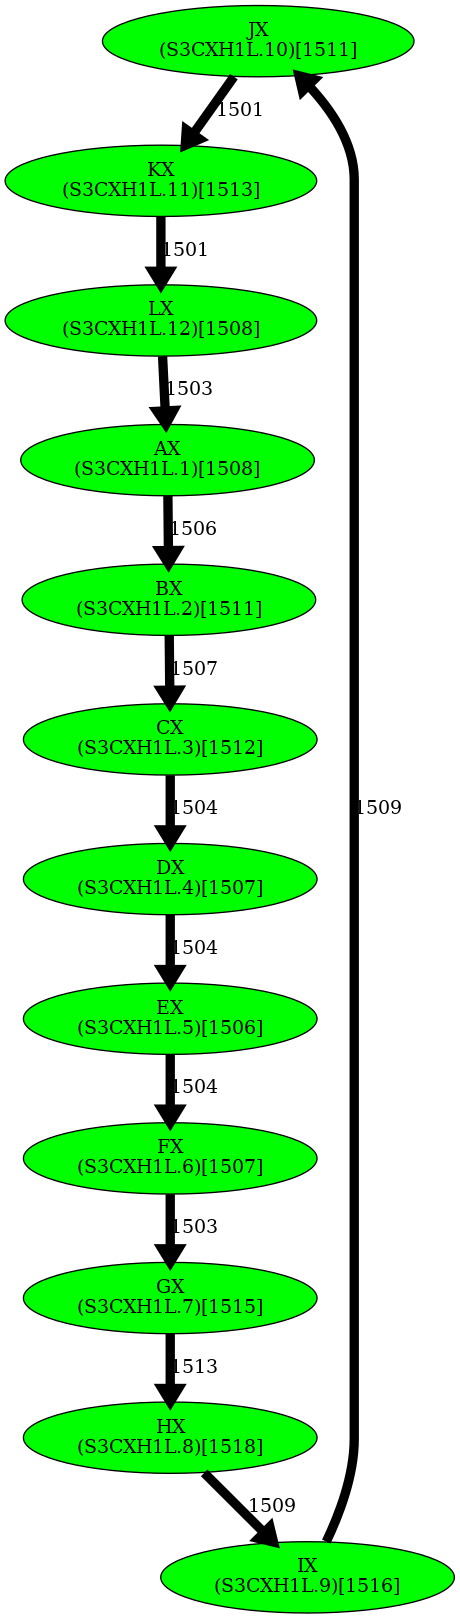

In [109]:
######### Figure SimplifiedMonomerGraph ##############

merge_split_simpl_graphs_lst = []
for c in cens:
    merge_split_simpl_graphs_lst.append(Image(os.path.join(PATH, "PaperResults", "cen" + c, "merge_split", "simpl_graph.png")))
display(*merge_split_simpl_graphs_lst)

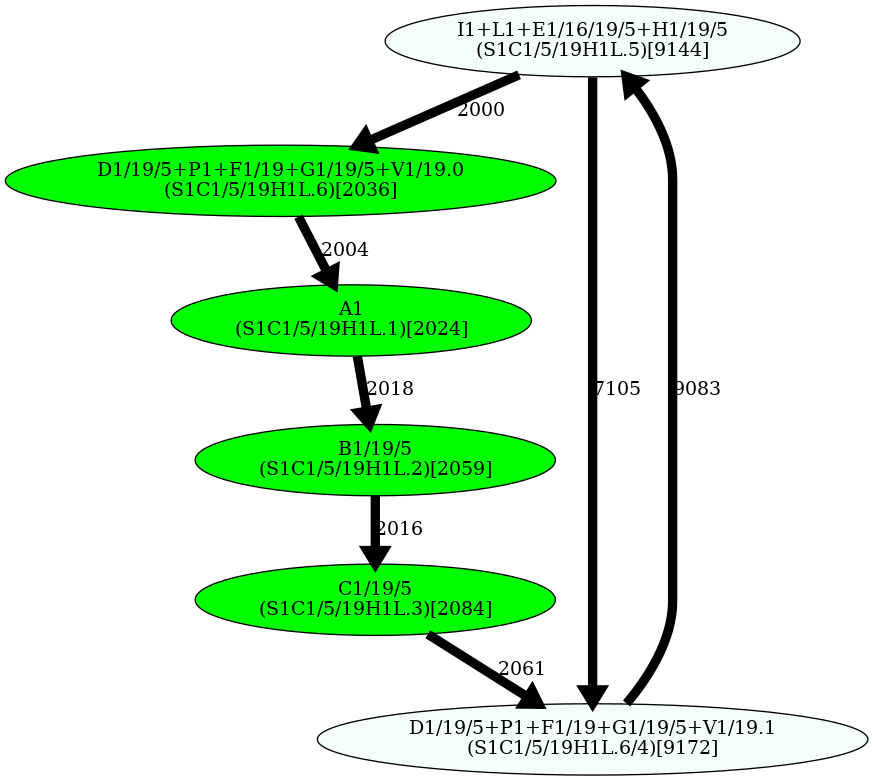

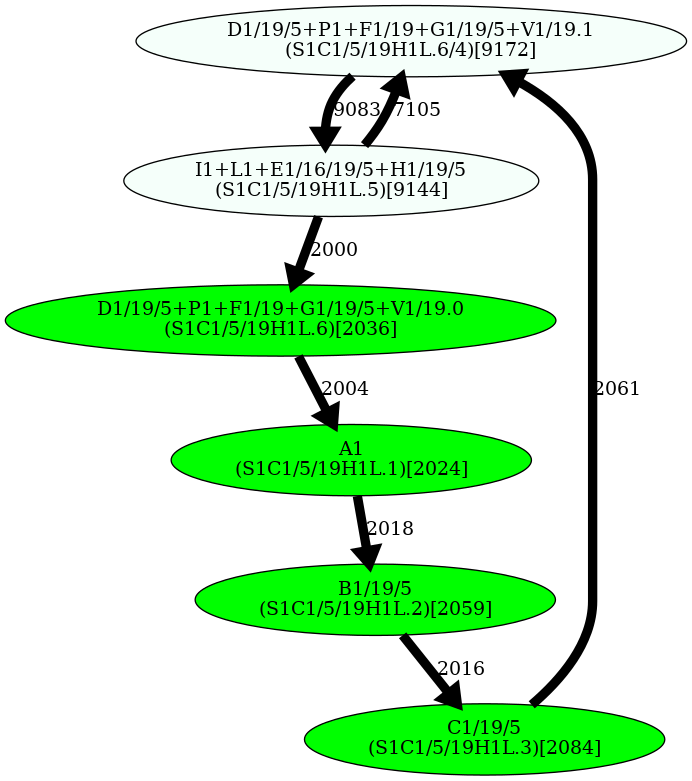

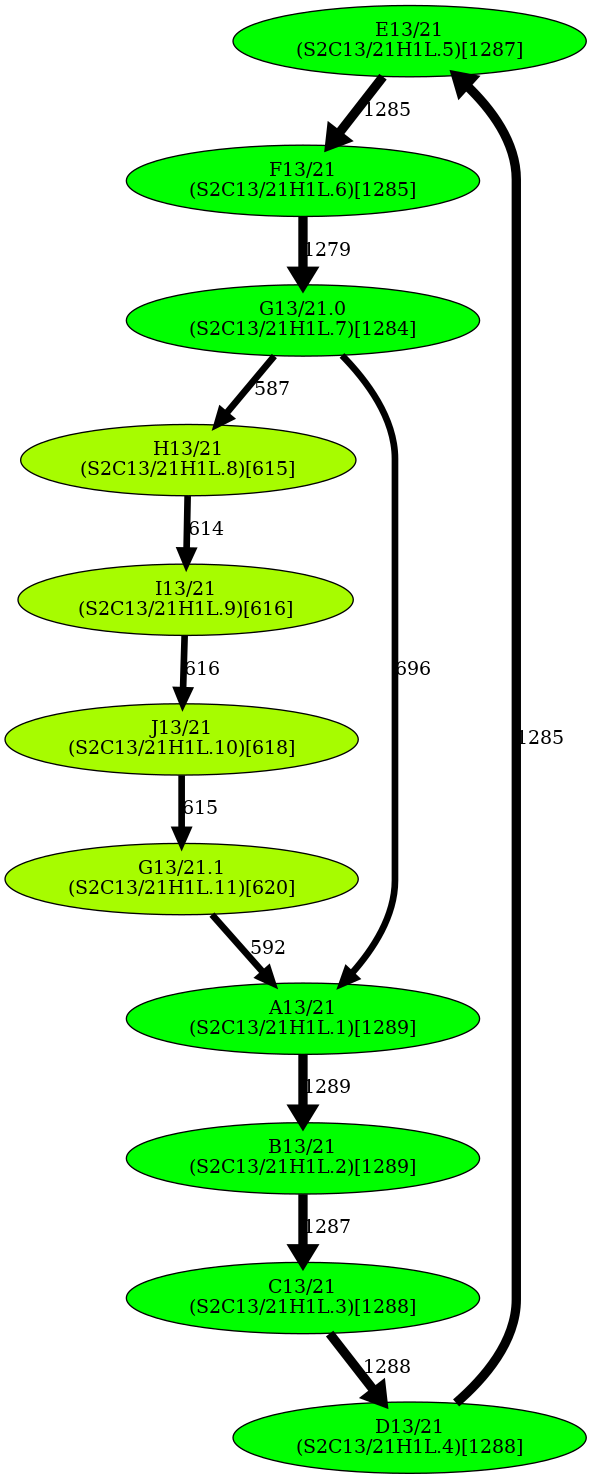

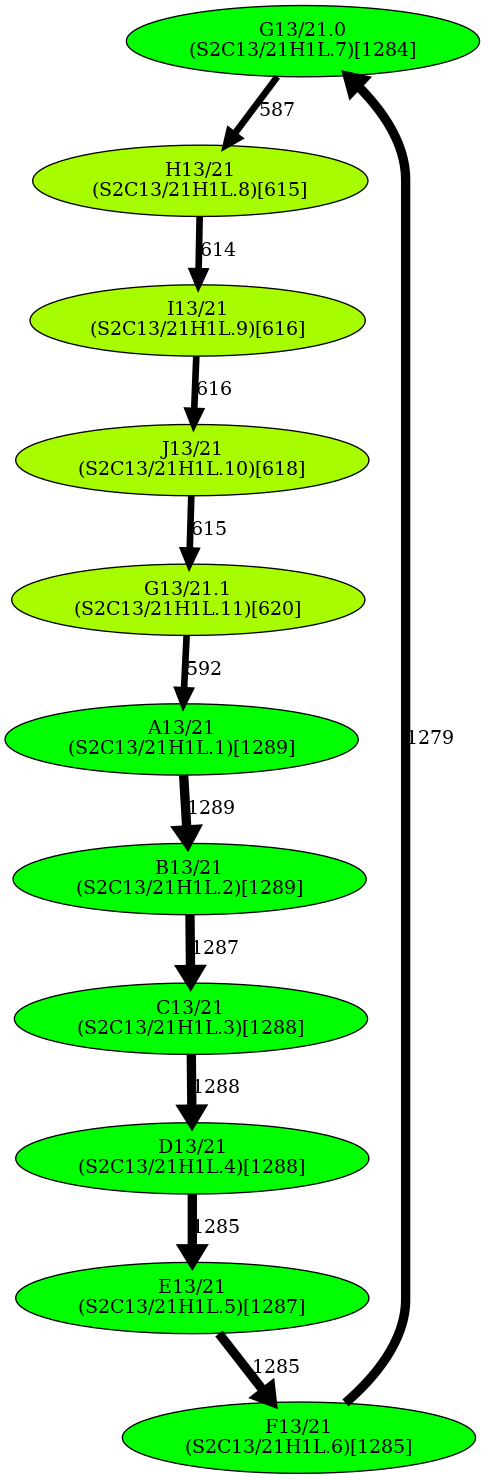

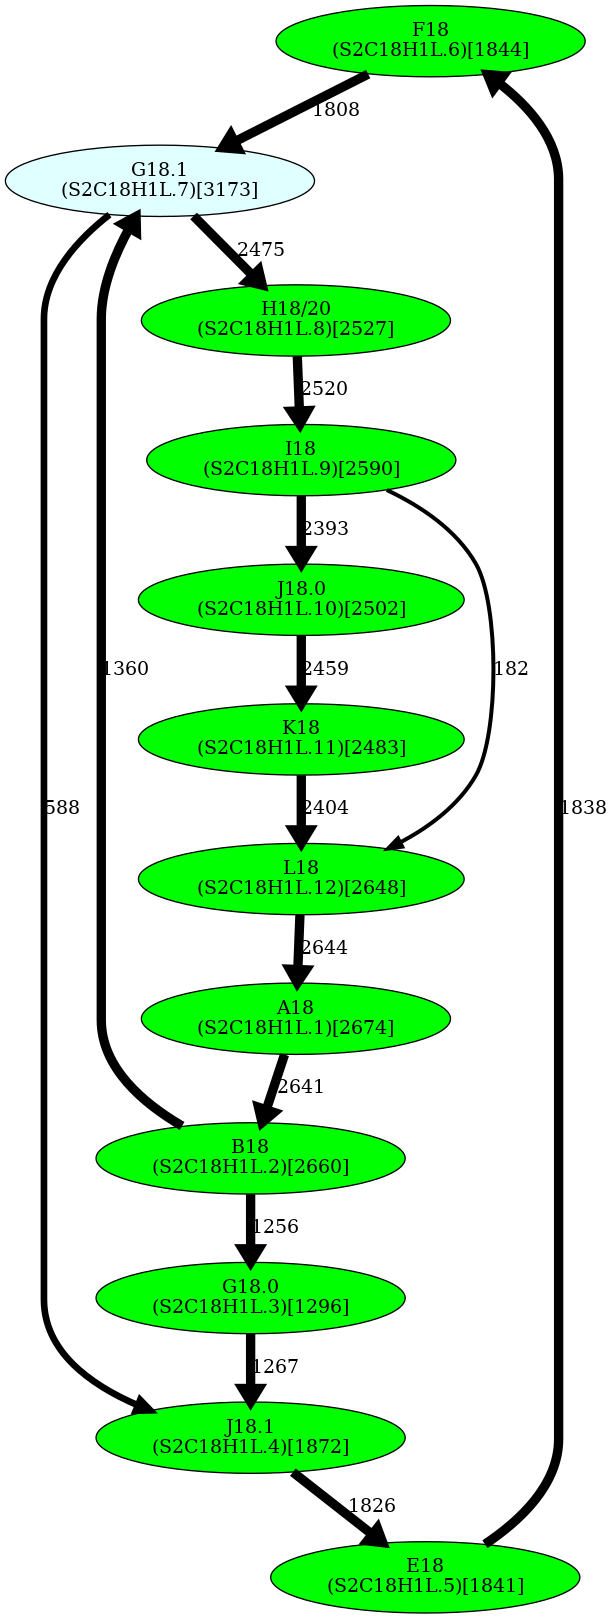

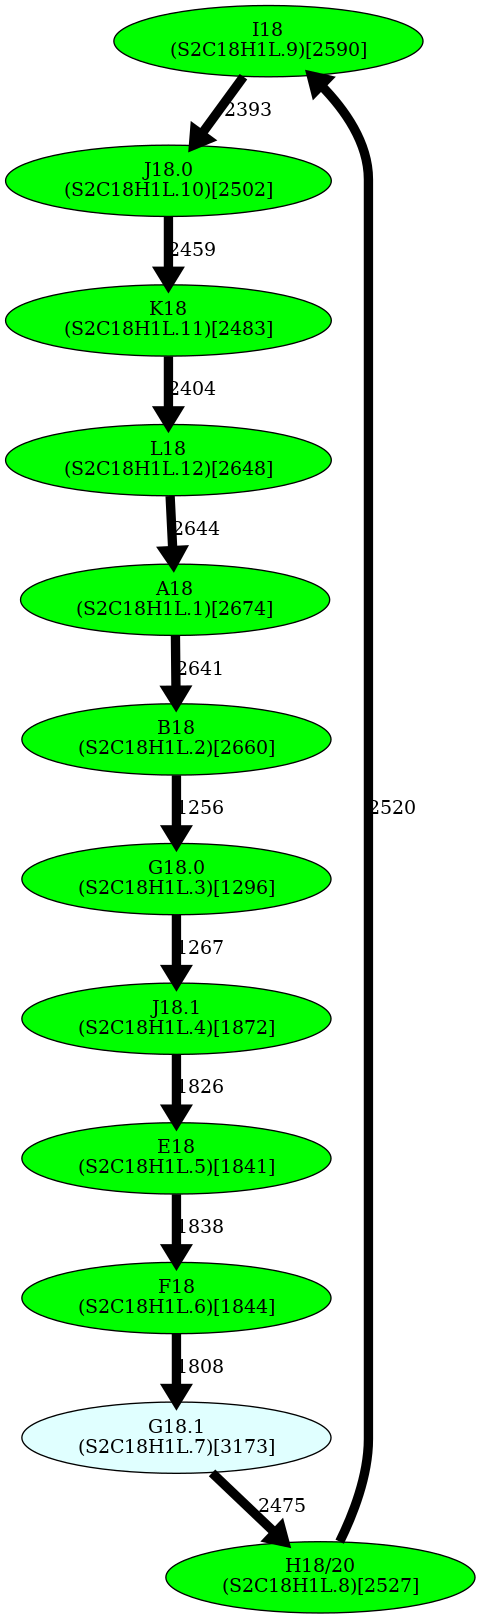

In [110]:
######### Figure cen1and13and18 ########

elcycle_graphs_lst = []
for c in ["1", "13", "18"]:
    elcycle_graphs_lst.append(Image(os.path.join(PATH, "PaperResults", "cen" + c, "ElCycleSplit", "graph.png")))
    elcycle_graphs_lst.append(Image(os.path.join(PATH, "PaperResults", "cen" + c, "finalMnUpdate", "simpl_graph.png")))
display(*elcycle_graphs_lst)

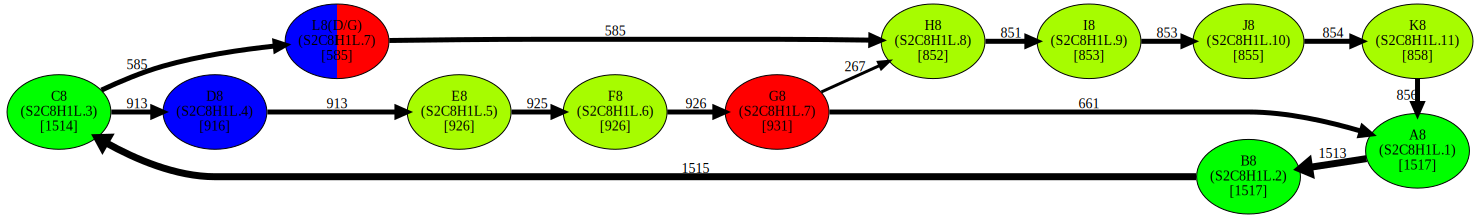

In [111]:
######### Figure cen8 (up) ########

with open(os.path.join(DATA_PATH, "PaperFigures","cen8_up.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

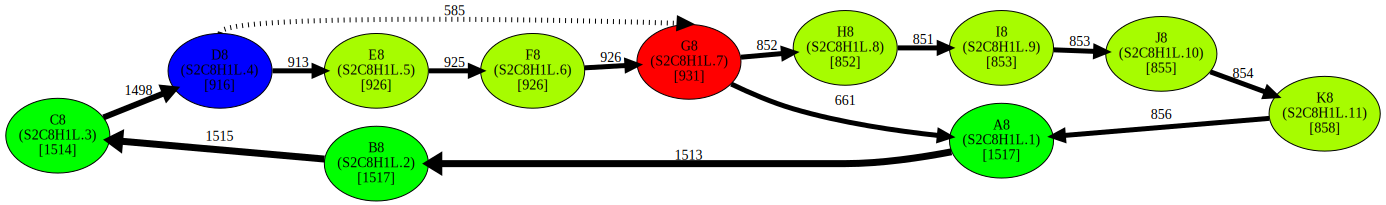

In [112]:
######### Figure cen8 (bottom) ########

with open(os.path.join(DATA_PATH, "PaperFigures","cen8_bottom.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

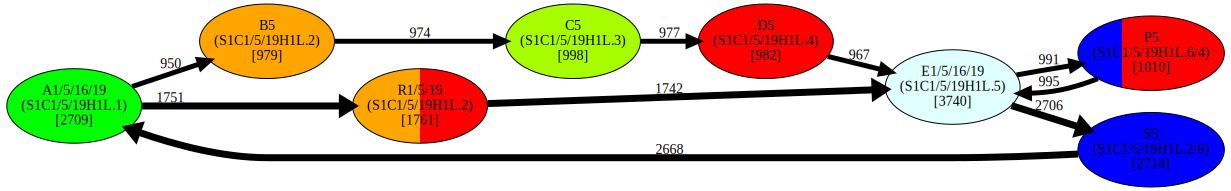

In [113]:
######### Figure cen5 (up) ########

with open(os.path.join(DATA_PATH, "PaperFigures","cen5_up.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

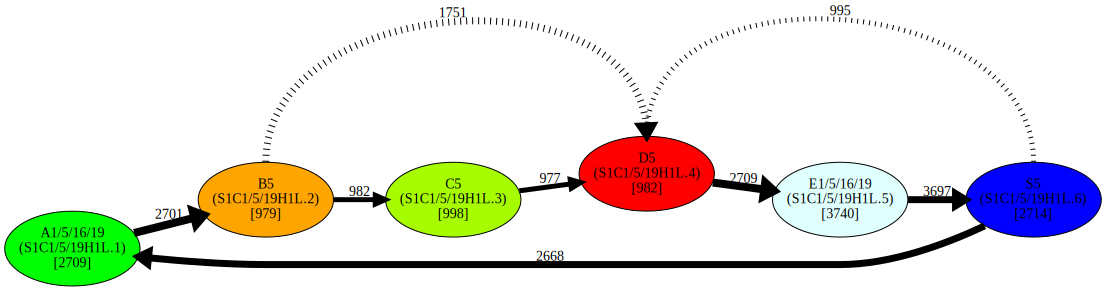

In [114]:
######### Figure cen5 (bottom) ########

with open(os.path.join(DATA_PATH, "PaperFigures","cen5_bottom.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

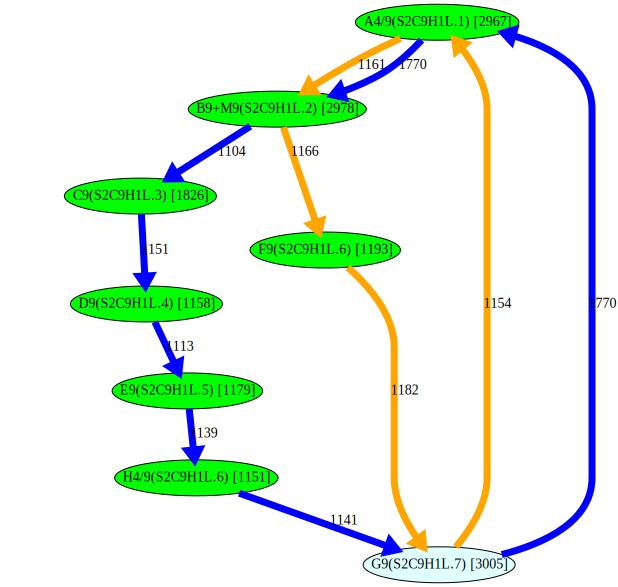

In [115]:
######### Figure cen9 ########

with open(os.path.join(DATA_PATH, "PaperFigures","cen9.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [96]:
######### Figure cenXdecomposition ########

for c in ["X"]:
    hordec_html = "<h3>cen" + c + "</h3>\n"
    dec = []
    hors_stats = {}
    rev = 0
    with open(os.path.join(OUT_PATH, "cen" + c, "HORdecomposition.reverted.collapsed.tsv"), "r") as fin:
        for ln in fin.readlines():
            hor = ln.split("\t")[1]
            if hor.startswith("c0"):
                hor = hor.replace("c0","c")
            if not hor.startswith("c"):
                hor_collapsed = hor.split("<sup>")[0]
                if hor_collapsed not in hors_stats:
                    hors_stats[hor_collapsed] = 0
                if "sup" in hor_collapsed:
                    hors_stats[hor_collapsed] += int(hor_collapsed.split("<sup>")[1][:-len("</sup>")])
                else:
                    hors_stats[hor_collapsed] += 1
            rev += 1 if "'" in hor else 0
            dec.append(hor)
    hors_lst = sorted([[h, hors_stats[h]] for h in hors_stats], key = lambda x: -x[1])
    best_hors = {}
    best_hors[hors_lst[0][0].replace("'", "")] = "blue"
    if len(hors_lst) > 1:
       best_hors[hors_lst[1][0].replace("'", "")] = "green"
    if len(hors_lst) > 2:
       best_hors[hors_lst[2][0].replace("'", "")] = "brown"
    if 2*rev > len(dec):
        dec = [x.replace("'", "") for x in dec][::-1]
    for i in range(len(dec)):
        if dec[i] in best_hors:
            dec[i] = '<span style="color:' +  best_hors[dec[i]] + ';">' + dec[i] + '</span>'
        elif dec[i].startswith("c"):
            dec[i] = '<span style="color: red;">' + dec[i] + '</span>'
    hordec_html += "".join(dec) + "\n"
display(HTML(hordec_html))

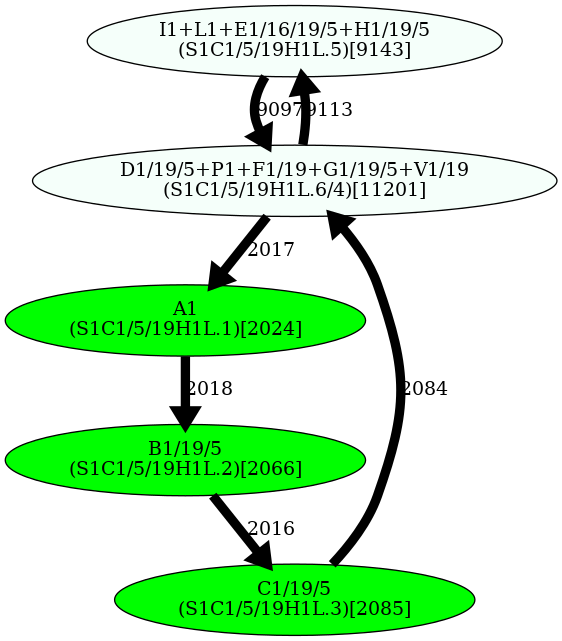

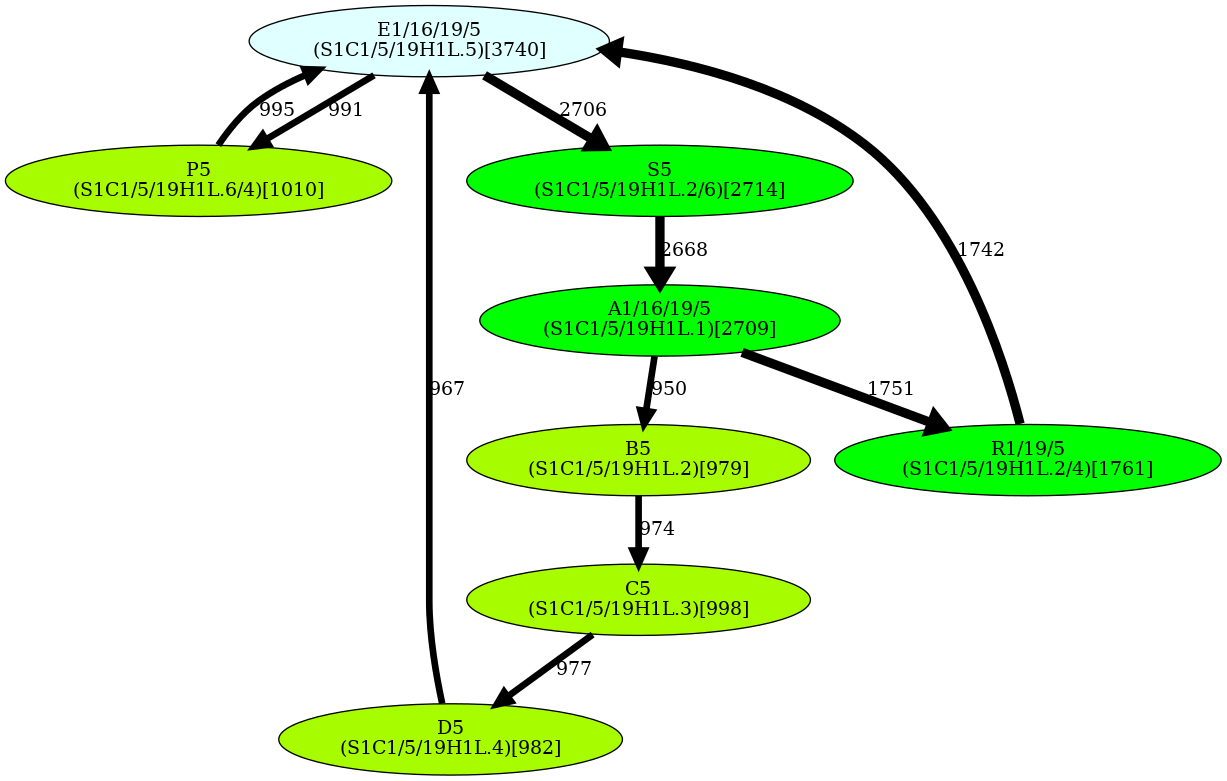

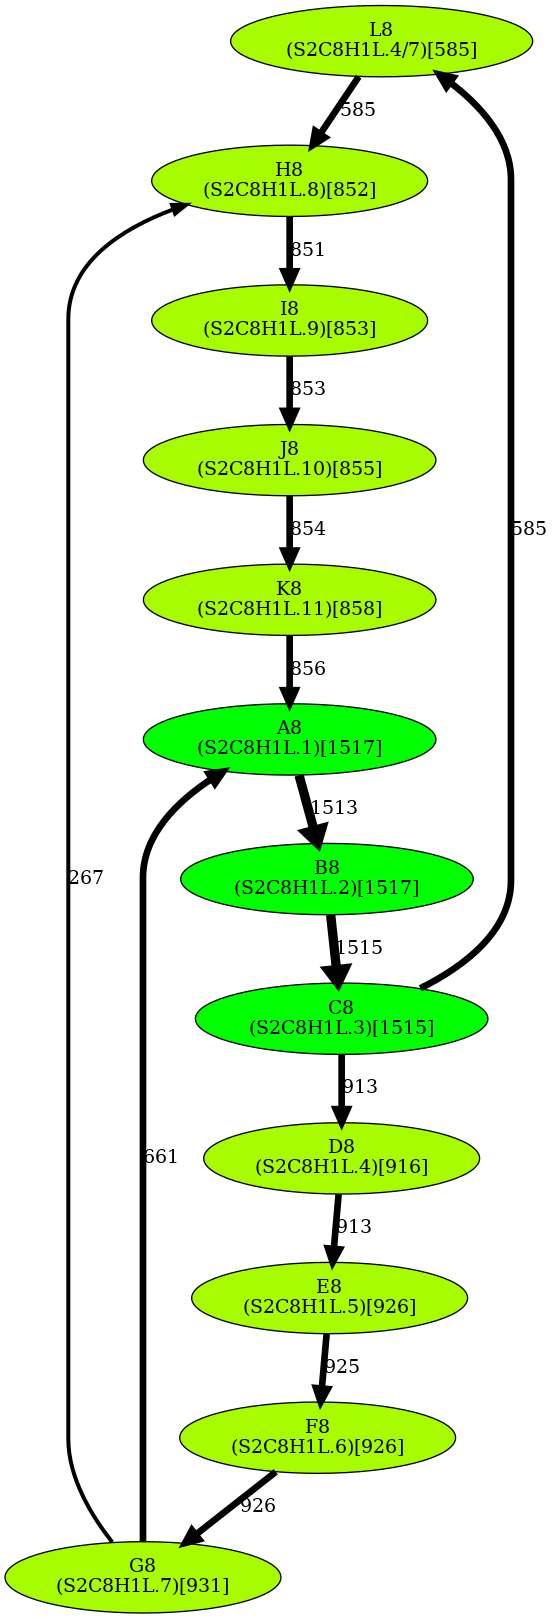

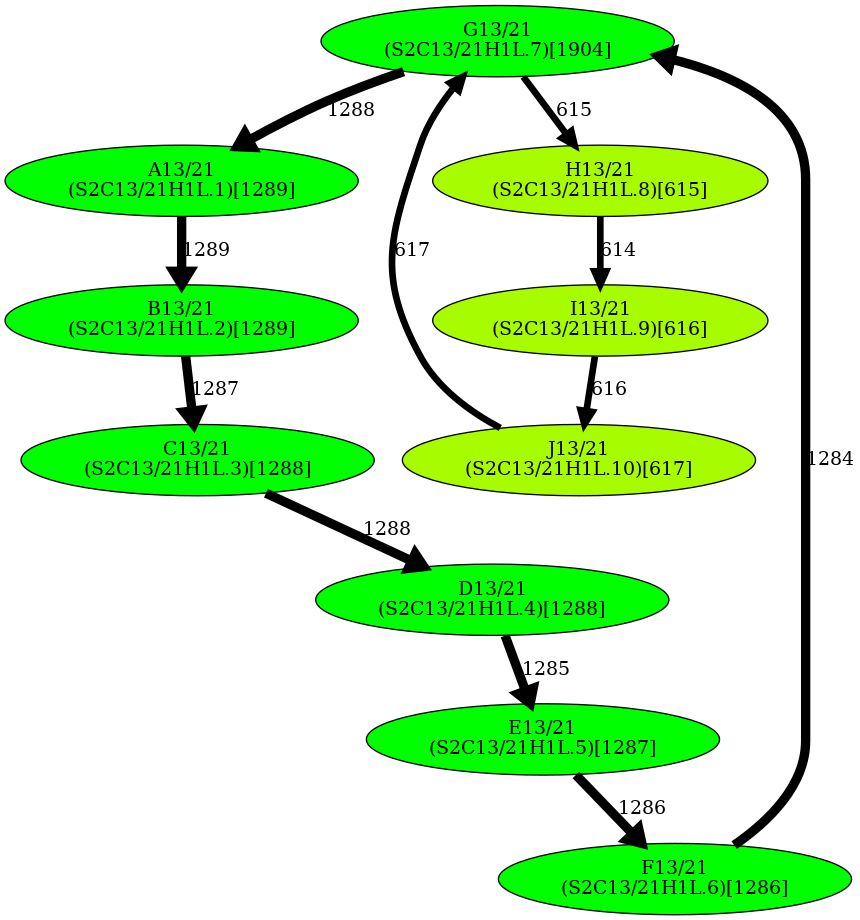

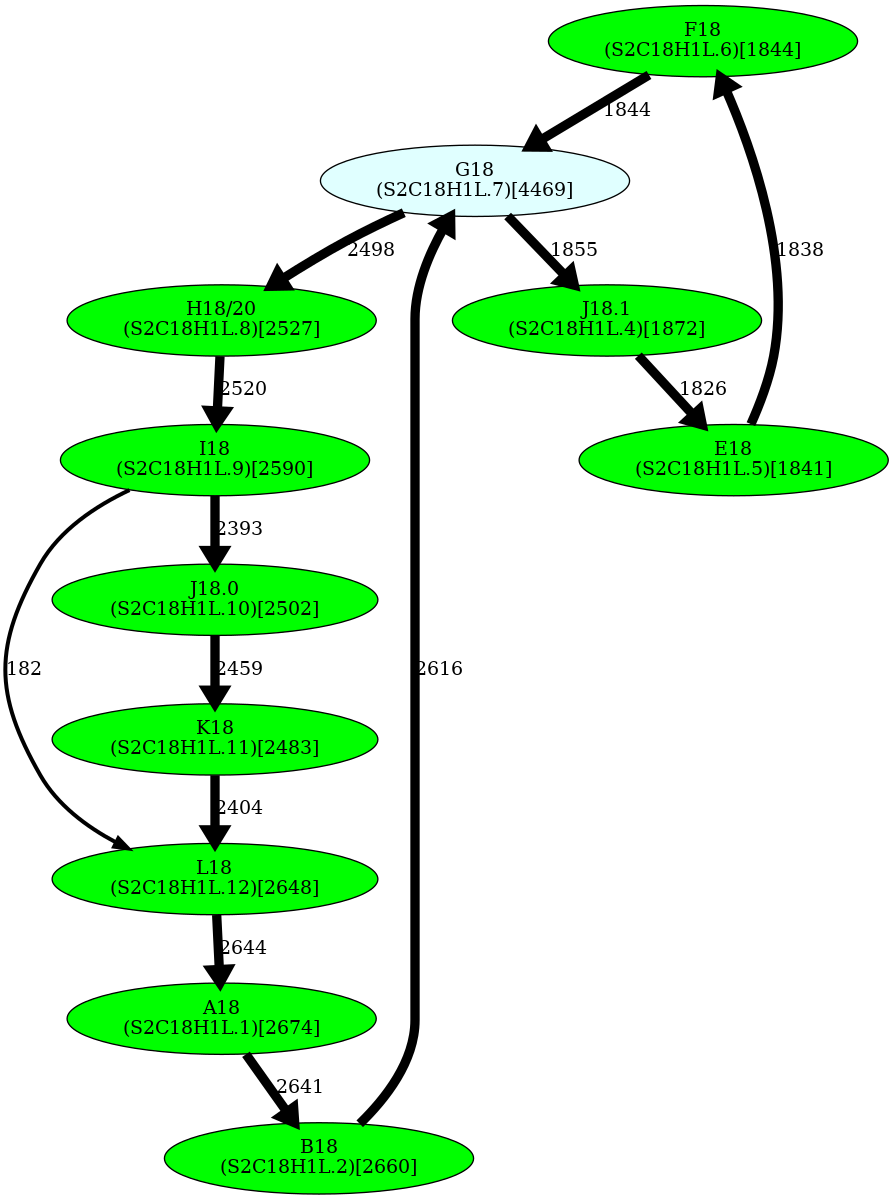

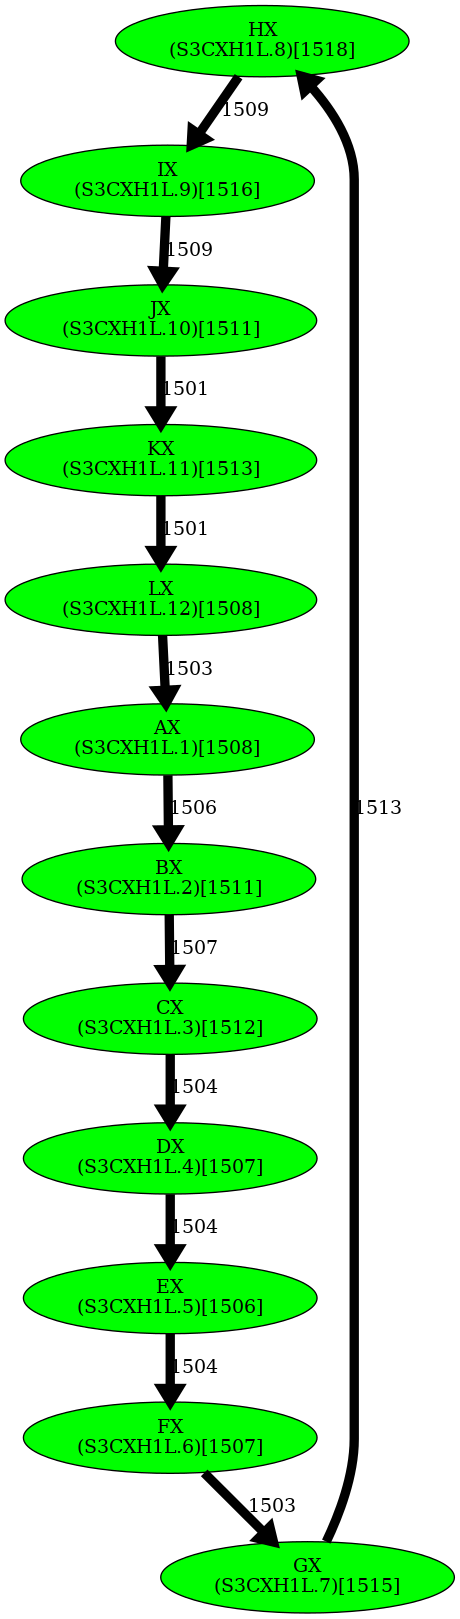

In [67]:
########### Supplementary Figure MonomerGraph #########

merge_split_graphs_lst = []
for c in cens:
    merge_split_graphs_lst.append(Image(os.path.join(PATH, "PaperResults", "cen" + c, "merge_split", "graph.png")))
display(*merge_split_graphs_lst)

In [71]:
############ Supplementary Table ModifiedMonomerSet ##########

res = []
cens = [str(i) for i in range(1, 23)] + ["X"]
for c in cens:
    if not os.path.exists(os.path.join(PATH, "PaperResults", "cen" + c, "merge_split", "MergeSplitStat.csv")):
        continue
    with open(os.path.join(PATH, "PaperResults", "cen" + c, "merge_split", "MergeSplitStat.csv"), "r") as fin:
        ln1 = fin.readline().strip().split(",")
        ln2 = fin.readline().strip().split(",")
        mp = {}
        for i in range(len(ln1)):
            mp[ln1[i]] = ln2[i]
    mn, mn_plus = mp["#Init mon"], mp["#Final mon"]
    merge, split = mp["#Merge"], mp["#Split"]
    sqmean, dbindex = "{:.2f}".format(float(mp["Final SqMean"])), "{:.2f}".format(float(mp["Final DBIndex"]))

    with open(os.path.join(PATH, "PaperResults", "cen" + c, "MonoRunRaw", "Monorunscnt.csv"), "r") as fin:
        edges = fin.readline().strip().split()[-1]
    res.append("\t".join([c, mn + "/" + mn_plus, edges, merge + "/" + split, sqmean, dbindex]))

print("\n".join(res))

1	12/5	6	7/0	3.15	3.03
2	4/4	8	0/0	2.34	1.93
3	17/17	17	0/0	1.79	1.67
4	17/19	24	0/2	1.31	4.96
5	8/8	10	0/0	1.62	1.79
6	18/18	19	0/0	0.93	1.57
7	6/6	7	0/0	1.40	6.25
8	12/12	14	0/0	1.20	3.34
9	11/8	10	3/0	2.48	2.88
10	8/8	11	0/0	1.96	1.65
11	5/5	5	0/0	1.67	0.89
12	8/8	10	0/0	1.87	2.66
13	10/10	11	0/0	1.01	1.78
14	8/8	8	0/0	1.44	2.55
15	12/11	12	1/0	2.02	2.02
16	10/10	10	0/0	1.55	2.23
17	31/30	30	2/1	1.37	2.95
18	10/11	13	0/1	1.48	2.60
19	5/2	2	3/0	3.33	1.20
20	15/16	16	0/1	1.33	2.97
21	10/11	11	0/1	1.55	1.44
22	8/8	8	0/0	1.55	2.70
X	12/12	12	0/0	1.42	1.60


In [76]:
######## Supplementary Table HORDecompositions (last column built manually) #########

MONOIDNT = 95

lens = [6,4,17,19,6,18,6,11,7,8,5,8,11,8,11,10,16,12,2,16,11,8,12]
canonical_len = {}

for i in range(len(cens)):
    canonical_len[cens[i]] = {"H1": lens[i]}
canonical_len["17"]["H2"] = 14

def load_monodec(filename):
    dec = []
    monomers = set()
    rc_num = 0
    with open(filename, "r") as fin:
        for ln in fin.readlines():
           if len(ln.strip().split("\t")) < 5:
              continue
           ref, mon, start, end, idnt = ln.strip().split("\t")[:5]
           if float(idnt) > MONOIDNT:
               dec.append([ref, mon, start, end, idnt])
               monomers.add(mon)
               if mon.endswith("'"):
                   rc_num += 1
    if rc_num > 0.5*len(dec):
         revert = True
    else:
         revert = False
    return dec, monomers, revert

def load_hordec(filename):
    dec = []
    monomers = set()
    with open(filename, "r") as fin:
        for ln in fin.readlines():
            if len(ln.strip().split("\t")) < 5:
                continue
            ref, hor, start, end, idnt, hor_name = ln.strip().split("\t")[:6]
            add = ""
            if hor.endswith("'"):
                add = "'"
            hor_ini = hor.split("<sup>")[0]
            if len(hor.split("<sup>")) > 1:
                hor_run = hor.split("<sup>")[1].split("<")[0]
            else:
                hor_run = 1
            dec.append([ref, hor_ini, int(hor_run), start, end, idnt, hor_name])
    return dec

def get_len(h, cen, hor_name):
    if h.startswith("c"):
        return canonical_len[cen][hor_name]
    elif h.startswith("p"):
        can_len = canonical_len[cen][hor_name]
        if "<sub>-" in h:
            l, r = h.split("<sub>-")[1].split("--")
            r = r.split("</sub>")[0]
            h = "p" + "<sub>" + r + "-" + l + "</sub>"
        l, r = map(int, h.split("<sub>")[1].split("<")[0].split("-"))
        if l < r:
            return r - l + 1
        else:
            return can_len - l + 1 + r
    else:
        return 1

def calc_stats(hor_dec, cen):
    hors = {}
    for h in hor_dec:
        if h[1].startswith("c"):
            if h[1].split("<sub>")[0] not in hors:
                hors[h[1].split("<sub>")[0]] = {"runs": 0, "cnt": 0, "len": get_len(h[1], cen, h[6])}
            hors[h[1].split("<sub>")[0]]["runs"] += 1
            hors[h[1].split("<sub>")[0]]["cnt"] += h[2]
        else:
            if h[1] not in hors:
                hors[h[1]] = {"runs": 0, "cnt": 0, "len": get_len(h[1], cen, h[6])}
            hors[h[1]]["runs"] += 1
            hors[h[1]]["cnt"] += h[2]
    return hors


res = []
for cen in cens:
    mono_dec, mons, revert = load_monodec(os.path.join(PATH, "PaperResults", "cen" + cen, "finalOriginal" ,"final_decomposition.tsv"))
    hor_dec = load_hordec(os.path.join(PATH, "PaperResults", "cen" + cen, "HORdecomposition.reverted.collapsed.tsv"))
    hors_stat = calc_stats(hor_dec, cen)
    can_nums = []
    for i in range(2):
        can = "c" + str(i)
        if can in hors_stat:
            can_nums.append(str(hors_stat[can]["cnt"]) + "/" + str(hors_stat[can]["runs"]))
    mon_total, mon_partial = 0, 0
    for h in hors_stat:
        mon_total += hors_stat[h]["len"]*hors_stat[h]["cnt"]
        if not h.startswith("c"):
            mon_partial += hors_stat[h]["len"]*hors_stat[h]["cnt"]
    hors_lst = sorted([[h.replace("<sub>", "").replace("</sub>", ""), hors_stat[h]["cnt"]] for h in hors_stat if not h.startswith("c")], key = lambda x: -x[1])
    res.append("\t".join([cen, str(len(mons))+ "/" + str(len(mono_dec)), " ".join(can_nums),\
           str(mon_partial) + "/" + str(int(mon_partial*100/mon_total)),\
           " ".join(["/".join(map(str, x)) for x in hors_lst[:3]]), str(len(hor_dec))]))
print("\n".join(res))

1	12/25770	1916/1824	12434/51	p4-5/2794 p-5--4/1794 I1+L1+E1/16/19/5+H1/19/5/1271	6679
2	4/13450	2665/1026	2790/20	A2/571 p4-2/323 p4-1/238	2681
3	17/8252	325/27	2727/33	p8-6'/69 p6-4'/65 F3'/16	138
4	19/21429	766/288	6875/32	H4/9/124 p1-3/116 p17-18/95	1407
5	8/14843	903/889	9425/63	R1/19/5/1757 p5-1/1727 P5/999	6512
6	18/16249	651/181	4531/27	p16-12/225 p17-12/46 p14-11/9	417
7	6/19096	3054/209	772/4	p2-4/47 C7/33 p5-2/31	472
8	12/12231	559/397	6082/49	L8/585 p1-7/348 p1-3/313	1760
9	8/14944	925/897	8469/56	F9/1176 p7-2/1019 p7-3/624	4192
10	8/11388	820/658	4828/42	p5-2/551 E10/360 p1-2/104	1769
11	5/19668	3904/56	148/0	p5-2/10 p5-1/8 p3-1/6	108
12	8/14694	1348/529	3910/26	p6-1'/186 p2-7'/94 p6-4'/93	1437
13	11/11466	601/355	4856/42	p1-7'/654 p1-6'/9 p8-11'/9	734
14	8/15170	1835/83	490/3	G14/22'/41 p4-5'/41 p1-5'/16	249
15	11/5767	354/307	1873/32	p1-4'/280 p9-4'/40 p1-6'/30	728
16	10/11367	999/165	1377/12	I16/70 p2-6/51 p8-3/41	475
17	30/23609	1040/112 188/11	4337/18	p2-16/120 p15-13

In [77]:
########### Supplementary Table MonomerNaming - built manually #######

In [79]:
########### Run Monomer Comparison MonomersT2T vs CAMonomers #######

cens = [str(i) for i in range(1, 23)] + ["X"]
outdir = os.path.join(OUT_PATH, "T2TvsCAcomparison")
if not os.path.exists(outdir):
    os.mkdir(outdir)
# for c in cens:
#     os.system(" ".join(["python3", os.path.join(PATH, "PaperScripts", "CompareMonomersSets.py"),\
#                        "--IA", os.path.join(DATA_PATH, "MonomersT2T", "cen" + c + "_monomers.fa"),\
#                        "--CA", os.path.join(DATA_PATH, "CAMonomers", "cen" + c + "_monomers.fa"),\
#                        "--seq", os.path.join(DATA_PATH, "CentromereFasta", "cen" + c + ".fa"),\
#                        "-o", os.path.join(outdir, "cen" + c)] ))

In [90]:
########### Table MonomerComparison1 ##############

import pandas as pd

comparison_table = pd.read_csv(os.path.join(outdir, "MonomerComparasion.csv"), sep = "\t", header = None)
print(comparison_table)

     0                  1          2          3   4   5   6
0    6  26504/26504/26486  2.55/2.60  3.44/3.15   6  23   6
1    4  13744/13744/13744  2.33/2.33  1.95/1.95   4  10   4
2   17     8485/8485/8485  1.78/1.78  1.46/1.46  17  24  17
3   19  21715/21715/21711  1.55/1.25  2.63/3.05  19  25  19
4    8  14893/14893/14893  1.62/1.62  1.79/1.79   8  19   8
5   18  16315/16315/16313  0.91/0.91  1.47/1.47  18  19  18
6    6  19375/19375/19373  1.34/1.34  4.24/4.24   6  17   6
7   12  12247/12247/12243  1.03/1.03  1.19/1.19  12  12  12
8    8  15456/15456/15456  2.70/2.49  2.91/2.89   8  26   8
9    8  11967/11967/11967  1.95/1.95  1.68/1.68   8  36   8
10   5  19718/19718/19718  1.67/1.67  0.89/0.89   5  14   5
11   8  15204/15204/15204  1.86/1.86  2.71/2.71   8  21   8
12  11  11478/11478/11476  0.92/0.88  1.05/1.42  11  14  11
13   8  15349/15349/15349  1.43/1.43  2.56/2.56   8  14   8
14  11     5941/5941/5941  1.87/1.77  2.19/2.07  11  16  11
15  10  11393/11393/11391  1.47/1.47  1.

In [91]:
########### Run Monomer Comparison CAMonomers vs MonomersNewPlus #######

cens = [str(i) for i in range(1, 23)] + ["X"]
outdir = os.path.join(OUT_PATH, "CAvsHORmoncomparison")
if not os.path.exists(outdir):
    os.mkdir(outdir)
# for c in cens:
#     os.system(" ".join(["python3", os.path.join(PATH, "PaperScripts", "CompareMonomersSets.py"),\
#                        "--IA", os.path.join(DATA_PATH, "CAMonomers", "cen" + c + "_monomers.fa"),\
#                        "--CA", os.path.join(DATA_PATH, "MonomersNewPlus", "cen" + c + "_monomers.fa"),\
#                        "--seq", os.path.join(DATA_PATH, "CentromereFasta", "cen" + c + ".fa"),\
#                        "-o", os.path.join(outdir, "cen" + c)] ))

In [92]:
########### Table MonomerComparison2 ##############

comparison_table = pd.read_csv(os.path.join(outdir, "MonomerComparasion.csv"), sep = "\t", header = None)
print(comparison_table)

     0                  1          2          3   4   5   6
0    6  26504/26504/26486  2.55/2.60  3.44/3.15   6  23   6
1    4  13744/13744/13744  2.33/2.33  1.95/1.95   4  10   4
2   17     8485/8485/8485  1.78/1.78  1.46/1.46  17  24  17
3   19  21715/21715/21711  1.55/1.25  2.63/3.05  19  25  19
4    8  14893/14893/14893  1.62/1.62  1.79/1.79   8  19   8
5   18  16315/16315/16313  0.91/0.91  1.47/1.47  18  19  18
6    6  19375/19375/19373  1.34/1.34  4.24/4.24   6  17   6
7   12  12247/12247/12243  1.03/1.03  1.19/1.19  12  12  12
8    8  15456/15456/15456  2.70/2.49  2.91/2.89   8  26   8
9    8  11967/11967/11967  1.95/1.95  1.68/1.68   8  36   8
10   5  19718/19718/19718  1.67/1.67  0.89/0.89   5  14   5
11   8  15204/15204/15204  1.86/1.86  2.71/2.71   8  21   8
12  11  11478/11478/11476  0.92/0.88  1.05/1.42  11  14  11
13   8  15349/15349/15349  1.43/1.43  2.56/2.56   8  14   8
14  11     5941/5941/5941  1.87/1.77  2.19/2.07  11  16  11
15  10  11393/11393/11391  1.47/1.47  1.